# Telco Customer Churn

In [5]:
import os

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exploratory Data Analysis

First, lets define the functions for plotting the data.

In [19]:
# Histogram of column data
def plot_histogram(df, n_histogram_shown, n_histogram_per_row):
    n_unique = df.nunique()
    df = df[[col for col in df if 1 < n_unique[col] < 50]]
    n_row, n_col = df.shape
    column_names = list(df)
    n_hist_row = (n_col + n_histogram_per_row - 1) // n_histogram_per_row
    plt.figure(num=None, figsize=(6 * n_histogram_per_row, 8 * n_hist_row), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(n_col, n_histogram_shown)):
        plt.subplot(n_hist_row, n_histogram_per_row, i + 1)
        df.iloc[:, i].hist()
        plt.ylabel("counts")
        plt.xticks(rotation=90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [43]:
# Correlation matrix
def plot_correlation_matrix(df, graph_width):
    file_name = df.dataframeName
    df = df.dropna(axis="columns")
    df = df[[col for col in df if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2.)')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
    corr_mat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_mat)
    plt.title(f'Correlation matrix for {file_name}', fontsize=15)
    plt.show()

Let's load the data and take a quick look at it.

In [45]:
# Scatter and density plots
def plot_scatter_matrix(df, plot_size, text_size):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis="columns")
    df = df[[col for col in df if df[col].nunique() > 1]]
    column_names = list(df)
    if len(column_names) > 10:
        column_names = column_names[:10]
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plot_size, plot_size), diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Correlation coefficient = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [9]:
print(os.listdir("data/"))
n_rows_read = None # specify 'None' if you want to read the whole file
df1 = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv", delimiter=",", nrows=n_rows_read)
df1.dataframeName = "WA_Fn-UseC_-Telco-Churn.csv"
n_row, n_col = df1.shape
print(f'There are {n_row} rows and {n_col} columns')
df1.head(10)


['WA_Fn-UseC_-Telco-Customer-Churn.csv']
There are 7043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


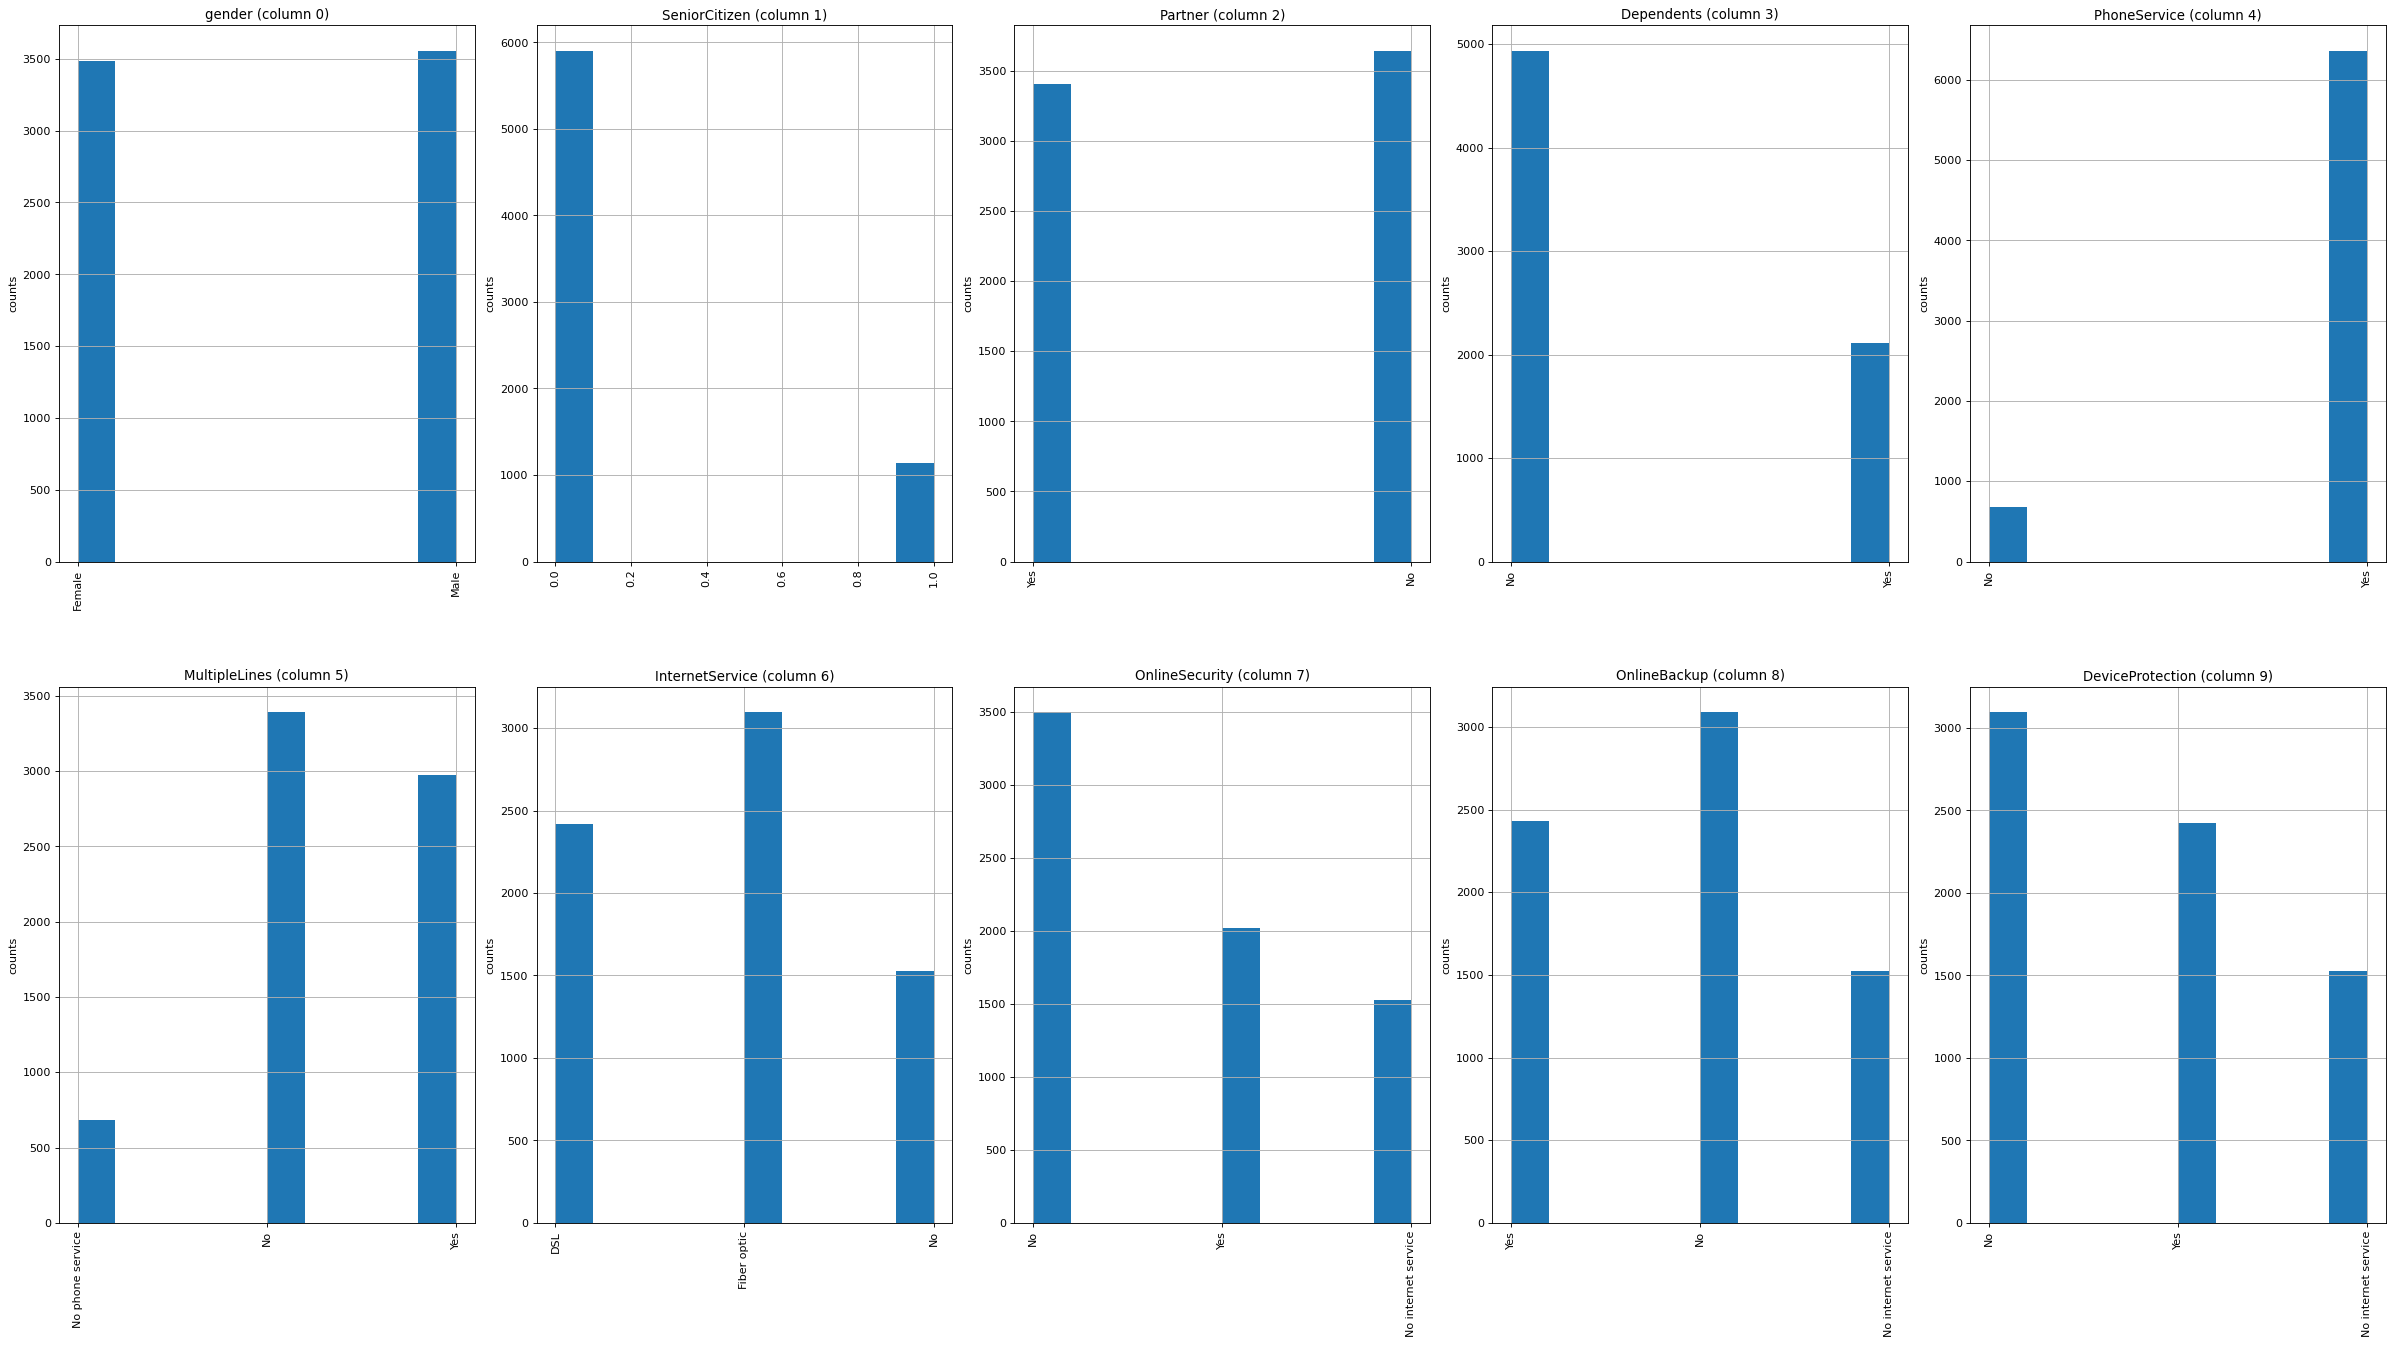

In [20]:
plot_histogram(df1, 10, 5)

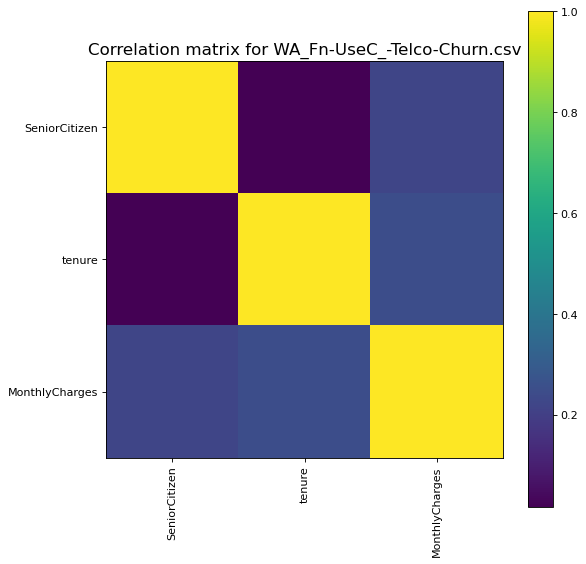

In [44]:
plot_correlation_matrix(df1, 8)

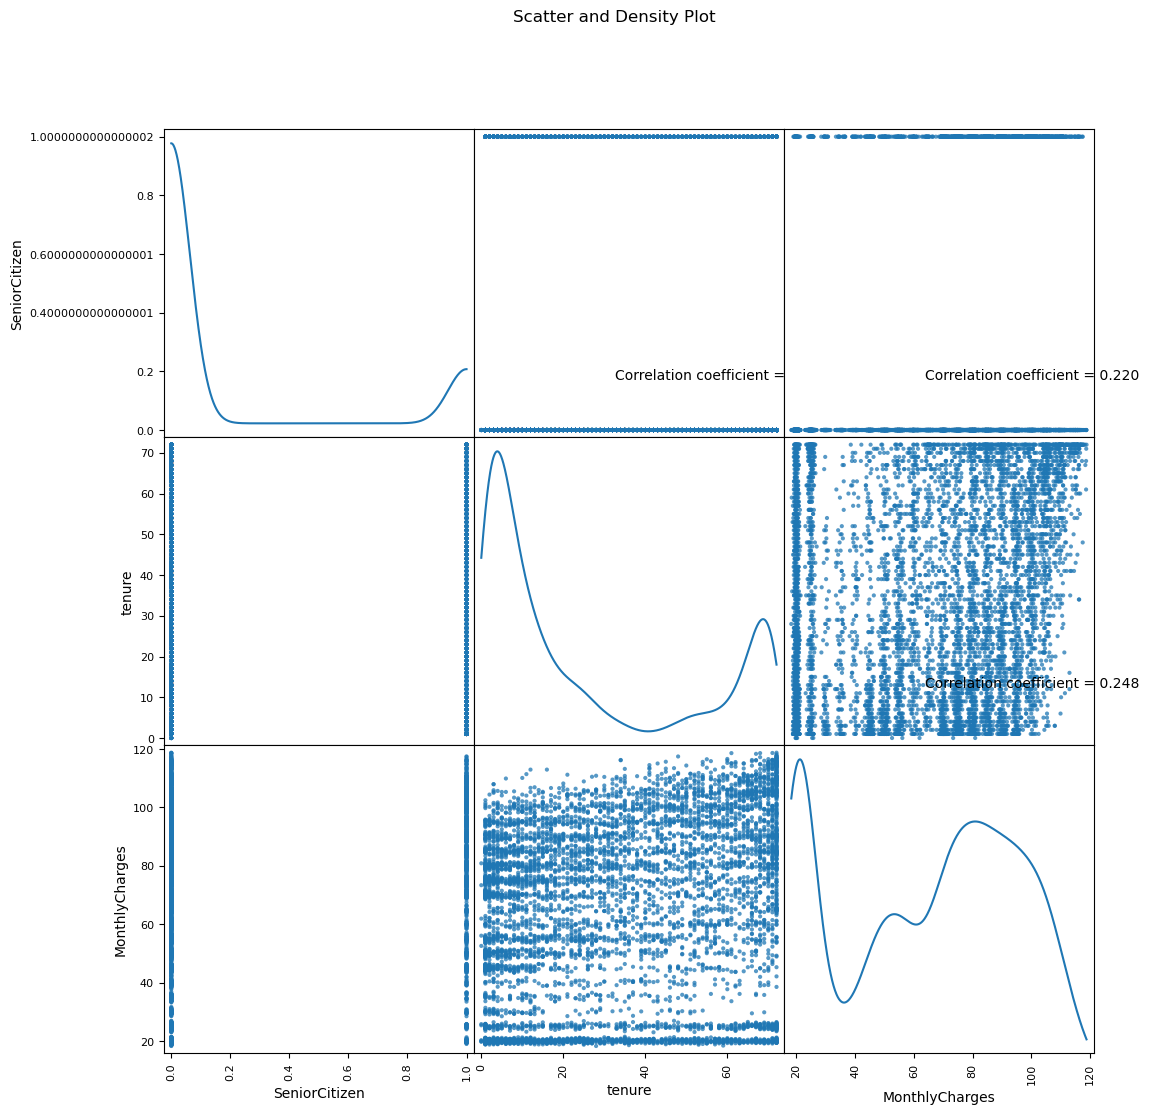

In [46]:
plot_scatter_matrix(df1, 12, 10)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [51]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64